In [1]:
# Q: Have we made this project too much into a DS project?
# Q: Attacking the house recommendation space using different methods in order to investigate which one is the best eg we have decision and random forest to do house rec using same parameters, is this okay? 
# Q: What type of explanations whould we be giving for the models? We would like your advice on this.
# import needed libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
# load the data
df = pd.read_csv('synthetic_house_recommendation_data.csv')


In [3]:
df.head()


,Unnamed: 0,latitude,longitude,house_type,price,bedrooms,bathrooms,neighbourhood_quality,house_condition,crime_rate,garden_size,house_keywords
0,0,53.108470,-0.411203,Terraced,300890.76,7,4,Pleasant,Abysmal,High,94.20,"['reception', 'forest-view', 'study-room', 're..."
1,1,55.854867,-4.279985,Land,272455.06,4,3,Pleasant,Alright,Medium,260.42,"['garden', 'laundry-room', 'comfortable', 'saf..."
2,2,51.523723,-2.500452,Land,172964.52,1,3,Pleasant,Alright,Medium,78.91,"['sauna', 'secure', 'recessed-lighting', 'buil..."
3,3,51.759018,-0.245954,Terraced,329183.39,3,1,Alright,Pleasant,Medium,31.37,"['crown-molding', 'greenhouse', 'peaceful', 'l..."
4,4,50.731135,-3.504734,Terraced,739525.34,3,2,Pleasant,Alright,Low,6.00,"['convenient', 'condo', 'water-saving', 'perma..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   latitude               30000 non-null  object 
 2   longitude              30000 non-null  object 
 3   house_type             30000 non-null  object 
 4   price                  30000 non-null  float64
 5   bedrooms               30000 non-null  int64  
 6   bathrooms              30000 non-null  int64  
 7   neighbourhood_quality  30000 non-null  object 
 8   house_condition        30000 non-null  object 
 9   crime_rate             30000 non-null  object 
 10  garden_size            30000 non-null  float64
 11  house_keywords         30000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.7+ MB


In [5]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,garden_size
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,14999.500000,3.621642e+05,3.005933,2.002233,149.833012
std,8660.398374,2.846226e+05,1.407680,1.008495,393.886377
min,0.000000,1.731773e+04,1.000000,1.000000,0.060000
25%,7499.750000,1.763992e+05,2.000000,1.000000,17.967500
50%,14999.500000,2.841899e+05,3.000000,2.000000,49.200000
75%,22499.250000,4.565909e+05,4.000000,3.000000,135.220000
max,29999.000000,5.318473e+06,10.000000,8.000000,17606.120000


In [6]:
# 
print("Unique values in 'house_type':", df['house_type'].unique())
print('\n')
print("Unique values in 'neighbourhood_quality':", df['neighbourhood_quality'].unique())
print('\n')

print("Unique values in 'house_condition':", df['house_condition'].unique())
print('\n')

print("Unique values in 'crime_rate':", df['crime_rate'].unique())
print('\n')

print("Unique values in 'house_keywords':", df['house_keywords'].unique())
print('\n')


Unique values in 'house_type': ['Terraced' 'Land' 'Semi-Detached' 'Bungalow' 'Detached' 'Flat'
 'Park Home']


Unique values in 'neighbourhood_quality': ['Pleasant' 'Alright' 'Abysmal' 'Outstanding' 'Rough']


Unique values in 'house_condition': ['Abysmal' 'Alright' 'Pleasant' 'Outstanding' 'Rough']


Unique values in 'crime_rate': ['High' 'Medium' 'Low' 'Very Low' 'Very High' 'Non Existent' 'Extreme']


Unique values in 'house_keywords': ["['reception', 'forest-view', 'study-room', 'reverse-osmosis', 'solar-heating', 'laundry-room', 'brick-fireplace', 'backup-generator', 'damp-proof', 'safe', 'dog-run', 'carbon-monoxide-detectors', 'historic', 'rain-barrel', 'water-saving', 'earthquake-resistant', 'birdhouse', 'earthquake-resistant', 'catio', 'basement', 'sustainable', 'ecosystem-friendly', 'filtration-system', 'terrace', 'electric-stove', 'welcoming', 'utility-room', 'thermal-insulation', 'estate', 'soundproof', 'rustic', 'wainscoting', 'passive-house', 'vintage-style', 'classic', 'h

In [7]:
# deal with missing values in the dataset:
# check for missing values in the dataset
print("Missing values in the dataset:", df.isnull().sum())

Missing values in the dataset: Unnamed: 0               0
latitude                 0
longitude                0
house_type               0
price                    0
bedrooms                 0
bathrooms                0
neighbourhood_quality    0
house_condition          0
crime_rate               0
garden_size              0
house_keywords           0
dtype: int64


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Assuming 'df' is your DataFrame
# Columns to be one-hot encoded
categorical_columns = ['house_type', 'neighbourhood_quality', 'house_condition', 'crime_rate']

# Set up OneHotEncoder and ColumnTransformer
encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", encoder, categorical_columns)
], remainder='passthrough')

# Apply encoder to the data
df_encoded_array = transformer.fit_transform(df)

# Accessing categories from the fitted transformer
# Get the encoder and then the categories
fitted_encoder = transformer.named_transformers_['one_hot']
categories = fitted_encoder.categories_

# Creating a flat list of new column names for the categorical variables
category_mapping = [f"{cat}__{subcat}" for cat, sublist in zip(categorical_columns, categories) for subcat in sublist]

# Get names of columns that were not transformed (passthrough)
passthrough_indices = [i for i, col in enumerate(df.columns) if col not in categorical_columns]
passthrough_columns = [df.columns[i] for i in passthrough_indices]

# Combine all column names
all_columns = category_mapping + passthrough_columns

# Create the DataFrame with the appropriate column names
df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)  # Ensure to convert sparse matrix to array

# Check the first few rows of the encoded DataFrame
print(df_encoded.head())

  house_type__Bungalow house_type__Detached house_type__Flat house_type__Land  \
0                  0.0                  0.0              0.0              0.0   
1                  0.0                  0.0              0.0              1.0   
2                  0.0                  0.0              0.0              1.0   
3                  0.0                  0.0              0.0              0.0   
4                  0.0                  0.0              0.0              0.0   

  house_type__Park Home house_type__Semi-Detached house_type__Terraced  \
0                   0.0                       0.0                  1.0   
1                   0.0                       0.0                  0.0   
2                   0.0                       0.0                  0.0   
3                   0.0                       0.0                  1.0   
4                   0.0                       0.0                  1.0   

  neighbourhood_quality__Abysmal neighbourhood_quality__Alright  \
0

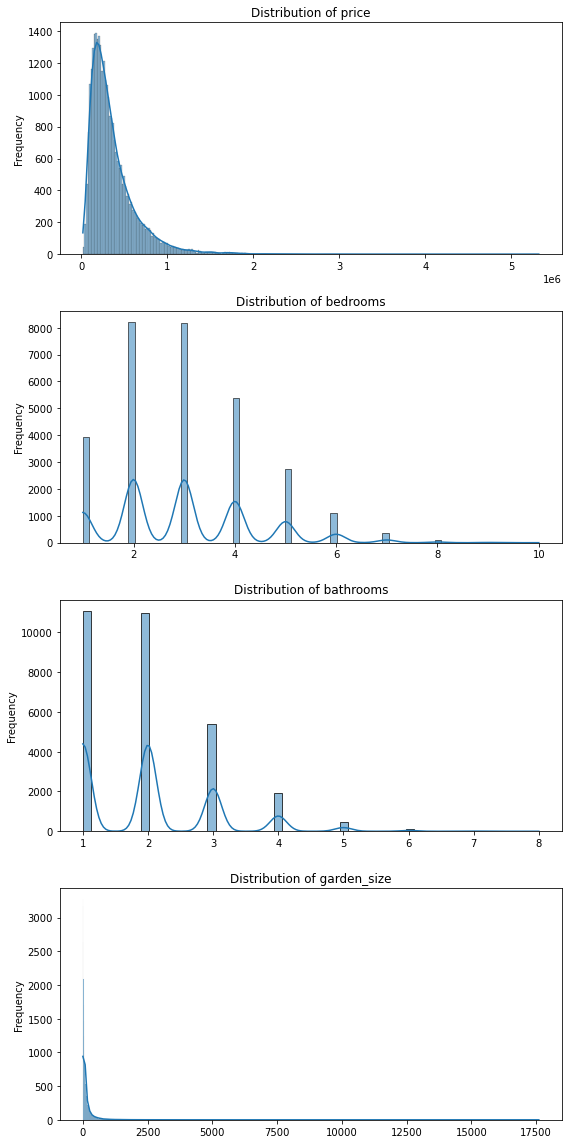

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['price', 'bedrooms', 'bathrooms', 'garden_size']

# Sample a subset of the data, say 10% of it
sample_df = df #sample(frac=0.1)

# Plotting distributions of numerical features on the sample
fig, ax = plt.subplots(len(numerical_features), 1, figsize=(8, 4 * len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.histplot(sample_df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Log-transform the 'price' column
# Assuming 'df' is your DataFrame that includes the 'price' column.
df_encoded['log_price'] = np.log1p(df['price'])

# Now you can visualize the distribution of the log-transformed price.
# sns.histplot(df['log_price'], kde=True)
# plt.title('Distribution of Log-transformed Price')
# plt.xlabel('Log(Price)')
# plt.ylabel('Frequency')
# plt.show()

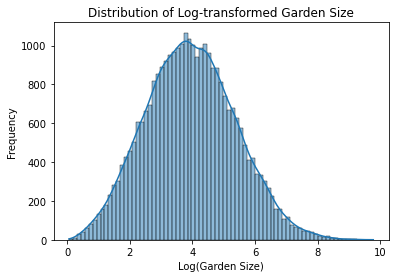

In [11]:
# transform the garden size because of extreme right skewness!
# Visualizing the distribution of the log-transformed garden size
df_encoded['garden_size'] = df_encoded['garden_size'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Now apply the log1p transformation
df_encoded['log_garden_size'] = np.log1p(df_encoded['garden_size'])

# Visualize the distribution of the log-transformed garden size
sns.histplot(df_encoded['log_garden_size'], kde=True)
plt.title('Distribution of Log-transformed Garden Size')
plt.xlabel('Log(Garden Size)')
plt.ylabel('Frequency')
plt.show()


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  object 
 1   house_type__Detached                30000 non-null  object 
 2   house_type__Flat                    30000 non-null  object 
 3   house_type__Land                    30000 non-null  object 
 4   house_type__Park Home               30000 non-null  object 
 5   house_type__Semi-Detached           30000 non-null  object 
 6   house_type__Terraced                30000 non-null  object 
 7   neighbourhood_quality__Abysmal      30000 non-null  object 
 8   neighbourhood_quality__Alright      30000 non-null  object 
 9   neighbourhood_quality__Outstanding  30000 non-null  object 
 10  neighbourhood_quality__Pleasant     30000 non-null  object 
 11  neighbourhood_quality__Rough        30000

In [13]:


# Ensure the target variable 'log_price' is also correctly typed
# df_encoded['log_price'] = pd.to_numeric(df['log_price'], errors='coerce')
#df_encoded['log_price'] = pd.to_numeric(df_encoded['log_price'])
# Convert 'log_price' to numeric, coercing errors to NaN
df_encoded['log_price'] = pd.to_numeric(df_encoded['log_price'], errors='coerce')

# Optionally handle NaN values by replacing them with the mean or median
df_encoded['log_price'].fillna(df_encoded['log_price'].mean(), inplace=True)


In [14]:
# List of columns that are known to be binary (one-hot encoded)
binary_columns = [
    'house_type__Bungalow', 'house_type__Detached', 'house_type__Flat', 'house_type__Land', 
    'house_type__Park Home', 'house_type__Semi-Detached', 'house_type__Terraced',
    'neighbourhood_quality__Abysmal', 'neighbourhood_quality__Alright', 
    'neighbourhood_quality__Outstanding', 'neighbourhood_quality__Pleasant', 
    'neighbourhood_quality__Rough', 'house_condition__Abysmal', 'house_condition__Alright', 
    'house_condition__Outstanding', 'house_condition__Pleasant', 'house_condition__Rough', 
    'crime_rate__Extreme', 'crime_rate__High', 'crime_rate__Low', 'crime_rate__Medium', 
    'crime_rate__Non Existent', 'crime_rate__Very High', 'crime_rate__Very Low'
]

# Convert these columns explicitly to integer
for col in binary_columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Verify changes
print(df_encoded[binary_columns].dtypes)


house_type__Bungalow                  int32
house_type__Detached                  int32
house_type__Flat                      int32
house_type__Land                      int32
house_type__Park Home                 int32
house_type__Semi-Detached             int32
house_type__Terraced                  int32
neighbourhood_quality__Abysmal        int32
neighbourhood_quality__Alright        int32
neighbourhood_quality__Outstanding    int32
neighbourhood_quality__Pleasant       int32
neighbourhood_quality__Rough          int32
house_condition__Abysmal              int32
house_condition__Alright              int32
house_condition__Outstanding          int32
house_condition__Pleasant             int32
house_condition__Rough                int32
crime_rate__Extreme                   int32
crime_rate__High                      int32
crime_rate__Low                       int32
crime_rate__Medium                    int32
crime_rate__Non Existent              int32
crime_rate__Very High           

In [15]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  int32  
 1   house_type__Detached                30000 non-null  int32  
 2   house_type__Flat                    30000 non-null  int32  
 3   house_type__Land                    30000 non-null  int32  
 4   house_type__Park Home               30000 non-null  int32  
 5   house_type__Semi-Detached           30000 non-null  int32  
 6   house_type__Terraced                30000 non-null  int32  
 7   neighbourhood_quality__Abysmal      30000 non-null  int32  
 8   neighbourhood_quality__Alright      30000 non-null  int32  
 9   neighbourhood_quality__Outstanding  30000 non-null  int32  
 10  neighbourhood_quality__Pleasant     30000 non-null  int32  
 11  neighbourhood_quality__Rough        30000

In [19]:
# Handling other non-numeric columns if they still exist
remaining_object_columns = df_encoded.select_dtypes(include=['object']).columns
print("Remaining object columns:", remaining_object_columns)

# drop some unncessary cilumns for the model
df_encoded.drop(columns=['Unnamed: 0'], inplace=True)
df_encoded.drop(columns=['price'], inplace=True)
df_encoded.drop(columns=['house_keywords'], inplace=True)
df_encoded.drop(columns=['garden_size'], inplace=True)
# df_encoded.drop(columns=['latitude'], inplace=True)







# # You might need to convert other columns like 'price', 'latitude', 'longitude' to numeric types
# df_encoded['price'] = pd.to_numeric(df_encoded['price'], errors='coerce')
# df_encoded['latitude'] = pd.to_numeric(df_encoded['latitude'], errors='coerce')
# df_encoded['longitude'] = pd.to_numeric(df_encoded['longitude'], errors='coerce')

# # Fill NaN values if necessary
# df_encoded.fillna(df_encoded.mean(), inplace=True)


Remaining object columns: Index(['Unnamed: 0', 'latitude', 'longitude', 'price', 'bedrooms', 'bathrooms',
       'house_keywords'],
      dtype='object')


In [24]:
remaining_object_columns = df_encoded.select_dtypes(include=['object']).columns
print("Remaining object columns:", remaining_object_columns)
df_encoded['bathrooms'] = pd.to_numeric(df_encoded['bathrooms'], errors='coerce')
df_encoded['bedrooms'] = pd.to_numeric(df_encoded['bedrooms'], errors='coerce')
df_encoded['latitude'] = pd.to_numeric(df_encoded['latitude'], errors='coerce')
df_encoded['longitude'] = pd.to_numeric(df_encoded['longitude'], errors='coerce')

df_encoded.fillna(df_encoded.mean(), inplace=True)


Remaining object columns: Index([], dtype='object')


In [25]:
df_encoded.head()

,house_type__Bungalow,house_type__Detached,house_type__Flat,house_type__Land,house_type__Park Home,house_type__Semi-Detached,house_type__Terraced,neighbourhood_quality__Abysmal,neighbourhood_quality__Alright,neighbourhood_quality__Outstanding,...,crime_rate__Medium,crime_rate__Non Existent,crime_rate__Very High,crime_rate__Very Low,latitude,longitude,bedrooms,bathrooms,log_price,log_garden_size
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,53.108470,-0.411203,7,4,12.614506,4.555980
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,55.854867,-4.279985,4,3,12.515233,5.566128
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,51.523723,-2.500452,1,3,12.060848,4.380901
3,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,51.759018,-0.245954,3,1,12.704373,3.477232
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,50.731135,-3.504734,3,2,13.513765,1.945910


In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  int32  
 1   house_type__Detached                30000 non-null  int32  
 2   house_type__Flat                    30000 non-null  int32  
 3   house_type__Land                    30000 non-null  int32  
 4   house_type__Park Home               30000 non-null  int32  
 5   house_type__Semi-Detached           30000 non-null  int32  
 6   house_type__Terraced                30000 non-null  int32  
 7   neighbourhood_quality__Abysmal      30000 non-null  int32  
 8   neighbourhood_quality__Alright      30000 non-null  int32  
 9   neighbourhood_quality__Outstanding  30000 non-null  int32  
 10  neighbourhood_quality__Pleasant     30000 non-null  int32  
 11  neighbourhood_quality__Rough        30000

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = df_encoded.drop(columns=['log_price'], axis=1)
y = df_encoded['log_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [28]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.4910932124096291


RMSE in log scale: 0.7071067811865476
Average price error factor: 2.0281149816474726


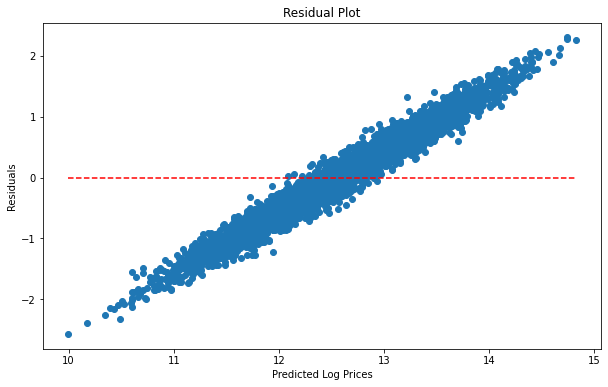

Text(0.5, 1.0, 'Top 10 Important Features')

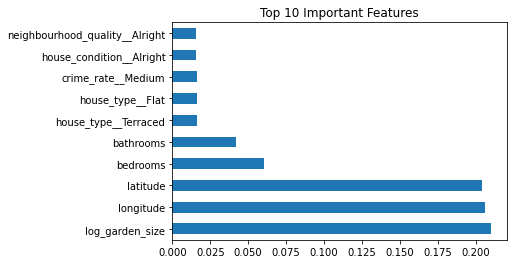

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate RMSE in log scale
RMSE_log = np.sqrt(0.50)
print(f'RMSE in log scale: {RMSE_log}')

# Convert RMSE from log scale to original scale to understand average error
average_price_error = np.exp(RMSE_log)
print(f'Average price error factor: {average_price_error}')

# Residuals plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
